In [149]:
import tensorflow.python as tf
from tensorflow.python import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import activations
from tensorflow.python.keras import optimizers
from tensorflow.python.keras import losses
from tensorflow.python.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
df = pd.read_csv('../TESTING_AREA/MLDL/datasets/YESBANK.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-21,18.950001,19.000000,18.000000,18.000000,18.000000,168955038
1,2020-12-22,17.400000,17.600000,17.100000,17.299999,17.299999,284913909
2,2020-12-23,17.500000,17.850000,17.049999,17.600000,17.600000,216066991
3,2020-12-24,17.900000,18.000000,17.299999,17.549999,17.549999,124638448
4,2020-12-28,17.799999,18.200001,17.549999,17.799999,17.799999,149082382


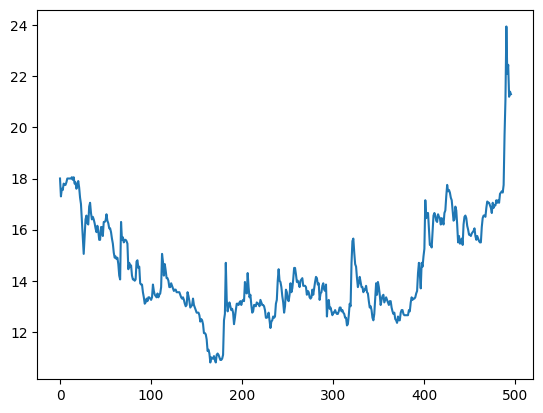

In [66]:
plt.plot(df['Close'])
plt.show()

In [153]:
len(df)

496

In [154]:
x = np.array(df.drop(['Date', 'Close'], axis=1))
x = x[:len(x) // 2]
print('x =', x.shape)
means = np.mean(x, axis=0, keepdims=True)
print('m =', means.shape)

x = np.lib.stride_tricks.sliding_window_view(x, 16, axis=0)
print('w =', x.shape)

x = (248, 5)
m = (1, 5)
w = (233, 5, 16)


In [155]:
x[:10].shape

(10, 5, 16)

In [156]:
def create_model():
    model = models.Sequential([
        layers.InputLayer((5, 16)),
        # layers.Reshape((1, 5, 16)),
        # layers.Conv2D(filters=16, kernel_size=(1, 3), activation='relu', padding='same'),
        # layers.Conv2D(filters=16, kernel_size=(1, 3), activation='relu', padding='same'),
        # layers.Conv2D(filters=16, kernel_size=(1, 3), activation='relu', padding='same'),
        # layers.Conv2D(filters=16, kernel_size=(1, 3), activation='relu', padding='valid'),
        # layers.Conv2D(filters=16, kernel_size=(1, 3), activation='relu', padding='valid'),
        # layers.Conv2D(filters=1, kernel_size=(1, 1), activation='relu', padding='valid'),
        # layers.Reshape((1,))
        layers.LSTM(64),
        layers.Reshape((-1, 1)),
        layers.Conv1D(filters=16, kernel_size=5),
        layers.Conv1D(filters=16, kernel_size=5),
        layers.Conv1D(filters=16, kernel_size=5),
        layers.Conv1D(filters=16, kernel_size=5),
        layers.Conv1D(filters=1, kernel_size=1),
        layers.Reshape((-1,)),
        layers.Dense(1)
    ])
    return model


create_model().summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                20736     
_________________________________________________________________
reshape_70 (Reshape)         (None, 64, 1)             0         
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 60, 16)            96        
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 56, 16)            1296      
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 52, 16)            1296      
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 48, 16)            1296      
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 48, 1)           

In [122]:
m1 = create_model()

In [157]:
m1.compile(
    optimizer=optimizers.adam_v2.Adam(learning_rate=0.000001),
    loss=losses.MSE,
    metrics=['mape', 'mae']
)

In [164]:
ts = time.time()
history = m1.fit(
    x=x,
    y=np.array(df['Close']).reshape((-1, 1))[:len(x)],
    # validation_data=0.3,
    batch_size=32,
    epochs=1
)
ts = time.time() - ts
print("Took", ts, "seconds")

4/4 [==============================] - 0s 28ms/step - loss: 8.4960 - mape: 16.7916 - mae: 2.3376
Took 0.340073823928833 seconds


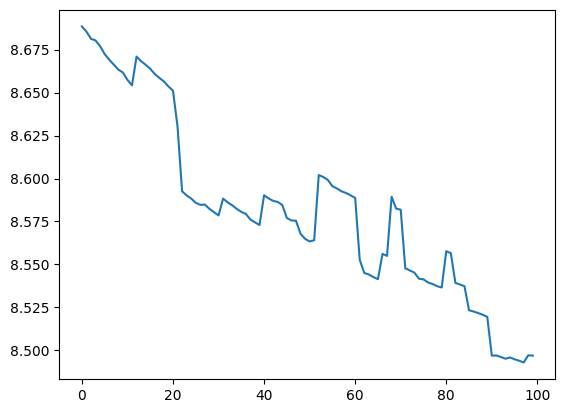

In [159]:
plt.plot(history.history['loss'])
plt.show()

In [160]:
x[9]

array([[1.84000000e+01, 1.79500010e+01, 1.82000010e+01, 1.82000010e+01,
        1.82000010e+01, 1.82999990e+01, 1.78500000e+01, 1.81500000e+01,
        1.78500000e+01, 1.77999990e+01, 1.81000000e+01, 1.78500000e+01,
        1.79500010e+01, 1.77000010e+01, 1.73500000e+01, 1.74000000e+01],
       [1.86000000e+01, 1.82500000e+01, 1.84000000e+01, 1.83500000e+01,
        1.82999990e+01, 1.85499990e+01, 1.85000000e+01, 1.82999990e+01,
        1.81000000e+01, 1.78500000e+01, 1.81000000e+01, 1.80000000e+01,
        1.80000000e+01, 1.77999990e+01, 1.75000000e+01, 1.75000000e+01],
       [1.79000000e+01, 1.77500000e+01, 1.77999990e+01, 1.78500000e+01,
        1.77999990e+01, 1.78500000e+01, 1.76000000e+01, 1.71500000e+01,
        1.76000000e+01, 1.72500000e+01, 1.74500010e+01, 1.76000000e+01,
        1.74000000e+01, 1.71500000e+01, 1.67500000e+01, 1.62500000e+01],
       [1.80000000e+01, 1.80000000e+01, 1.80000000e+01, 1.80000000e+01,
        1.80499990e+01, 1.79500010e+01, 1.80499990e+01, 1.779

In [161]:
m1.predict(x[None, 9])

array([[17.189857]], dtype=float32)

In [163]:
ts = time.time()
m1.predict(x[None, 9])
ts = time.time() - ts
print(ts)

0.08858203887939453
